In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
resp = requests.get("https://restcountries.eu/rest/v2/all")

In [3]:
resp.status_code

200

In [5]:
countries = pd.DataFrame(resp.json())

In [4]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 24 columns):
alpha2Code        250 non-null object
alpha3Code        250 non-null object
altSpellings      250 non-null object
area              240 non-null float64
borders           250 non-null object
callingCodes      250 non-null object
capital           250 non-null object
cioc              247 non-null object
currencies        250 non-null object
demonym           250 non-null object
flag              250 non-null object
gini              153 non-null float64
languages         250 non-null object
latlng            250 non-null object
name              250 non-null object
nativeName        250 non-null object
numericCode       249 non-null object
population        250 non-null int64
region            250 non-null object
regionalBlocs     250 non-null object
subregion         250 non-null object
timezones         250 non-null object
topLevelDomain    250 non-null object
translations      25

In [3]:
df = pd.DataFrame(resp.json(), 
       columns=['alpha2Code','name','capital','population','area','region','borders','currencies'])

In [4]:
df.set_index('alpha2Code', inplace=True)

In [5]:
df.head()

,name,capital,population,area,region,borders,currencies
alpha2Code,,,,,,,
AF,Afghanistan,Kabul,27657145,652230.0,Asia,"[IRN, PAK, TKM, UZB, TJK, CHN]","[{'code': 'AFN', 'name': 'Afghan afghani', 'sy..."
AX,Åland Islands,Mariehamn,28875,1580.0,Europe,[],"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]"
AL,Albania,Tirana,2886026,28748.0,Europe,"[MNE, GRC, MKD, KOS]","[{'code': 'ALL', 'name': 'Albanian lek', 'symb..."
DZ,Algeria,Algiers,40400000,2381741.0,Africa,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]","[{'code': 'DZD', 'name': 'Algerian dinar', 'sy..."
AS,American Samoa,Pago Pago,57100,199.0,Oceania,[],"[{'code': 'USD', 'name': 'United State Dollar'..."


In [16]:
df.loc['IN',['capital','population','area']]

capital         New Delhi
population     1295210000
area          3.28759e+06
Name: IN, dtype: object

In [17]:
df [ df['population'] > 500000000]

,name,capital,population,area,region,borders,currencies
alpha2Code,,,,,,,
CN,China,Beijing,1377422166,9640011.0,Asia,"[AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, ...","[{'code': 'CNY', 'name': 'Chinese yuan', 'symb..."
IN,India,New Delhi,1295210000,3287590.0,Asia,"[AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA]","[{'code': 'INR', 'name': 'Indian rupee', 'symb..."


In [18]:
df.loc[df['population'] > 500000000, ['name','population']]

,name,population
alpha2Code,,
CN,China,1377422166
IN,India,1295210000


In [20]:
df.nlargest(5,'population')

,name,capital,population,area,region,borders,currencies
alpha2Code,,,,,,,
CN,China,Beijing,1377422166,9640011.0,Asia,"[AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, ...","[{'code': 'CNY', 'name': 'Chinese yuan', 'symb..."
IN,India,New Delhi,1295210000,3287590.0,Asia,"[AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA]","[{'code': 'INR', 'name': 'Indian rupee', 'symb..."
US,United States of America,"Washington, D.C.",323947000,9629091.0,Americas,"[CAN, MEX]","[{'code': 'USD', 'name': 'United States dollar..."
ID,Indonesia,Jakarta,258705000,1904569.0,Asia,"[TLS, MYS, PNG]","[{'code': 'IDR', 'name': 'Indonesian rupiah', ..."
BR,Brazil,Brasília,206135893,8515767.0,Americas,"[ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, ...","[{'code': 'BRL', 'name': 'Brazilian real', 'sy..."


In [21]:
df.nlargest(5,'area')

,name,capital,population,area,region,borders,currencies
alpha2Code,,,,,,,
RU,Russian Federation,Moscow,146599183,17124442.0,Europe,"[AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, ...","[{'code': 'RUB', 'name': 'Russian ruble', 'sym..."
AQ,Antarctica,,1000,14000000.0,Polar,[],"[{'code': 'AUD', 'name': 'Australian dollar', ..."
CA,Canada,Ottawa,36155487,9984670.0,Americas,[USA],"[{'code': 'CAD', 'name': 'Canadian dollar', 's..."
CN,China,Beijing,1377422166,9640011.0,Asia,"[AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, ...","[{'code': 'CNY', 'name': 'Chinese yuan', 'symb..."
US,United States of America,"Washington, D.C.",323947000,9629091.0,Americas,"[CAN, MEX]","[{'code': 'USD', 'name': 'United States dollar..."


#### 04-SEP-2019

In [6]:
df['population'].mean()

29396548.924

In [14]:
df.loc[df['region'] == 'Europe','population'].mean()

14088456.264150944

In [18]:
df['capital'].str.upper()

alpha2Code
AF               KABUL
AX           MARIEHAMN
AL              TIRANA
DZ             ALGIERS
AS           PAGO PAGO
AD    ANDORRA LA VELLA
AO              LUANDA
AI          THE VALLEY
AQ                    
AG        SAINT JOHN'S
AR        BUENOS AIRES
AM             YEREVAN
AW          ORANJESTAD
AU            CANBERRA
AT              VIENNA
AZ                BAKU
BS              NASSAU
BH              MANAMA
BD               DHAKA
BB          BRIDGETOWN
BY               MINSK
BE            BRUSSELS
BZ            BELMOPAN
BJ          PORTO-NOVO
BM            HAMILTON
BT             THIMPHU
BO               SUCRE
BQ          KRALENDIJK
BA            SARAJEVO
BW            GABORONE
            ...       
SY            DAMASCUS
TW              TAIPEI
TJ            DUSHANBE
TZ              DODOMA
TH             BANGKOK
TL                DILI
TG                LOMÉ
TK             FAKAOFO
TO          NUKU'ALOFA
TT       PORT OF SPAIN
TN               TUNIS
TR              ANKARA


In [20]:
df[ df['region'].str.startswith('A')]

,name,capital,population,area,region,borders,currencies
alpha2Code,,,,,,,
AF,Afghanistan,Kabul,27657145,652230.00,Asia,"[IRN, PAK, TKM, UZB, TJK, CHN]","[{'code': 'AFN', 'name': 'Afghan afghani', 'sy..."
DZ,Algeria,Algiers,40400000,2381741.00,Africa,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]","[{'code': 'DZD', 'name': 'Algerian dinar', 'sy..."
AO,Angola,Luanda,25868000,1246700.00,Africa,"[COG, COD, ZMB, NAM]","[{'code': 'AOA', 'name': 'Angolan kwanza', 'sy..."
AI,Anguilla,The Valley,13452,91.00,Americas,[],"[{'code': 'XCD', 'name': 'East Caribbean dolla..."
AG,Antigua and Barbuda,Saint John's,86295,442.00,Americas,[],"[{'code': 'XCD', 'name': 'East Caribbean dolla..."
AR,Argentina,Buenos Aires,43590400,2780400.00,Americas,"[BOL, BRA, CHL, PRY, URY]","[{'code': 'ARS', 'name': 'Argentine peso', 'sy..."
AM,Armenia,Yerevan,2994400,29743.00,Asia,"[AZE, GEO, IRN, TUR]","[{'code': 'AMD', 'name': 'Armenian dram', 'sym..."
AW,Aruba,Oranjestad,107394,180.00,Americas,[],"[{'code': 'AWG', 'name': 'Aruban florin', 'sym..."
AZ,Azerbaijan,Baku,9730500,86600.00,Asia,"[ARM, GEO, IRN, RUS, TUR]","[{'code': 'AZN', 'name': 'Azerbaijani manat', ..."


In [28]:
df['borders'].to_list()

[['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN'],
 [],
 ['MNE', 'GRC', 'MKD', 'KOS'],
 ['TUN', 'LBY', 'NER', 'ESH', 'MRT', 'MLI', 'MAR'],
 [],
 ['FRA', 'ESP'],
 ['COG', 'COD', 'ZMB', 'NAM'],
 [],
 [],
 [],
 ['BOL', 'BRA', 'CHL', 'PRY', 'URY'],
 ['AZE', 'GEO', 'IRN', 'TUR'],
 [],
 [],
 ['CZE', 'DEU', 'HUN', 'ITA', 'LIE', 'SVK', 'SVN', 'CHE'],
 ['ARM', 'GEO', 'IRN', 'RUS', 'TUR'],
 [],
 [],
 ['MMR', 'IND'],
 [],
 ['LVA', 'LTU', 'POL', 'RUS', 'UKR'],
 ['FRA', 'DEU', 'LUX', 'NLD'],
 ['GTM', 'MEX'],
 ['BFA', 'NER', 'NGA', 'TGO'],
 [],
 ['CHN', 'IND'],
 ['ARG', 'BRA', 'CHL', 'PRY', 'PER'],
 [],
 ['HRV', 'MNE', 'SRB'],
 ['NAM', 'ZAF', 'ZMB', 'ZWE'],
 [],
 ['ARG', 'BOL', 'COL', 'GUF', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN'],
 [],
 [],
 [],
 [],
 ['MYS'],
 ['GRC', 'MKD', 'ROU', 'SRB', 'TUR'],
 ['BEN', 'CIV', 'GHA', 'MLI', 'NER', 'TGO'],
 ['COD', 'RWA', 'TZA'],
 ['LAO', 'THA', 'VNM'],
 ['CAF', 'TCD', 'COG', 'GNQ', 'GAB', 'NGA'],
 ['USA'],
 [],
 [],
 ['CMR', 'TCD', 'COD', 'COG', 'SSD', 'SDN'],
 ['CM

### plotting

In [11]:
regions = countries.groupby('region')['area'].sum()
regions

region
                 461.00
Africa      30323491.00
Americas    42248044.36
Asia        32064971.00
Europe      23138282.46
Oceania      8515313.00
Polar       14000000.00
Name: area, dtype: float64

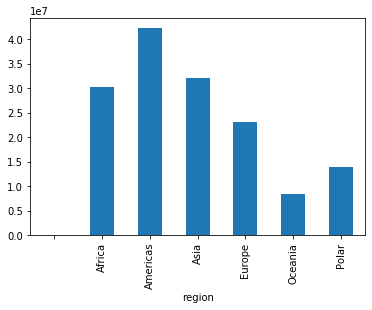

In [12]:
regions.plot(kind='bar')

In [8]:
%matplotlib inline